
# Preprocessing

The package offers preprocessing procedures.

- **Downsampling data**: by grouping data back blocks of fixed size (resolution) and applying the mean function to each block.
- **Normalization X,Y,Z coordinates**: normalizing the coordinates to the range [0,1] by subtracting the minimum and dividing by the maximum.
- **Standardization of V values**: standardizing the V values by subtracting the mean and dividing by the standard deviation.


## Downsampling

The downsampling procedure is implemented as taking the average of a block of given resolution. Can be easily customized.


## Normalization of XYZ and standardization of V

Normalizing the `XYZ` coordinates ensures that all the coordinates are within a similar range, which can help prevent one coordinate from dominating the kriging interpolation process. It is especially useful when the `XYZ` coordinates have different scales or units.

Standardizing the `V` values by centering them around 0 and giving them equal variances can help ensure that the kriging algorithm is not influenced by the absolute magnitude of `V`. This can be beneficial if the `V` values have a large range or if you want to focus more on the relative differences between `V` values rather than their absolute values.

By normalizing the XYZ coordinates and standardizing the `V` values, you align the scales of the different variables and make them more comparable, which can improve the performance of the kriging algorithm.

In [14]:
%load_ext autoreload
%autoreload 2

from py3Dinterpolations.core.griddata import GridData
from py3Dinterpolations.modelling.preprocessing import Preprocessing
from py3Dinterpolations.plotting.plotting import plot_downsampling

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
df = pd.read_csv(
    "../data/griddata_default_colnames.csv",
)
df.tail()

,Z,X,Y,ID,V
31669,-19.050,4686.534,672307.806,MIP14,705130
31670,-19.065,4686.534,672307.806,MIP14,705054
31671,-19.080,4686.534,672307.806,MIP14,706275
31672,-19.096,4686.534,672307.806,MIP14,705740
31673,-19.111,4686.534,672307.806,MIP14,758766


In [16]:
gd = GridData(df)
gd.data.head()

V
ID   X        Y          Z               
MIP9 4665.043 672282.574  0.000  166250.0
                         -0.015  165944.0
                         -0.030  166173.0
                         -0.046  166097.0
                         -0.061  166250.0

In [17]:
len(gd.data)

31674

In [18]:
prova = Preprocessing(gd, downsampling_res=None, normalize_xyz=False, standardize_v=False).preprocess()
prova.data.head()

V
ID   X        Y          Z               
MIP9 4665.043 672282.574  0.000  166250.0
                         -0.015  165944.0
                         -0.030  166173.0
                         -0.046  166097.0
                         -0.061  166250.0

In [20]:
prova.preprocessing_params

{'normalization': {'X': {'min': 4602.880000000005, 'max': 4781.548999999999},
  'Y': {'min': 672268.2379999999, 'max': 672341.7929999996},
  'Z': {'min': -19.111, 'max': 0.0}},
 'standardization': {'mean': 462356.21086695715, 'std': 566627.0061256837}}

In [6]:
preproc_gd = Preprocessing(
    gd, 
    normalize_xyz=True, 
    standardize_v=True, 
    downsampling_res=1.0
).preprocess()

In [7]:
preproc_gd.data.head()

V
ID   X        Y        Z                 
MIP9 0.347923 0.194902 1.000000 -0.543961
                       0.947368 -0.544122
                       0.894737 -0.464977
                       0.842105 -0.228924
                       0.789474 -0.343175

### Plot comparison of data before and after downsampling 

This method allows to plot the griddata before and after the downsampling. the plot allows to assess how the downsampling affects the data, by smoothing out peaks.


In [8]:
len(preproc_gd.data)

514

enter_norm
enter_stand


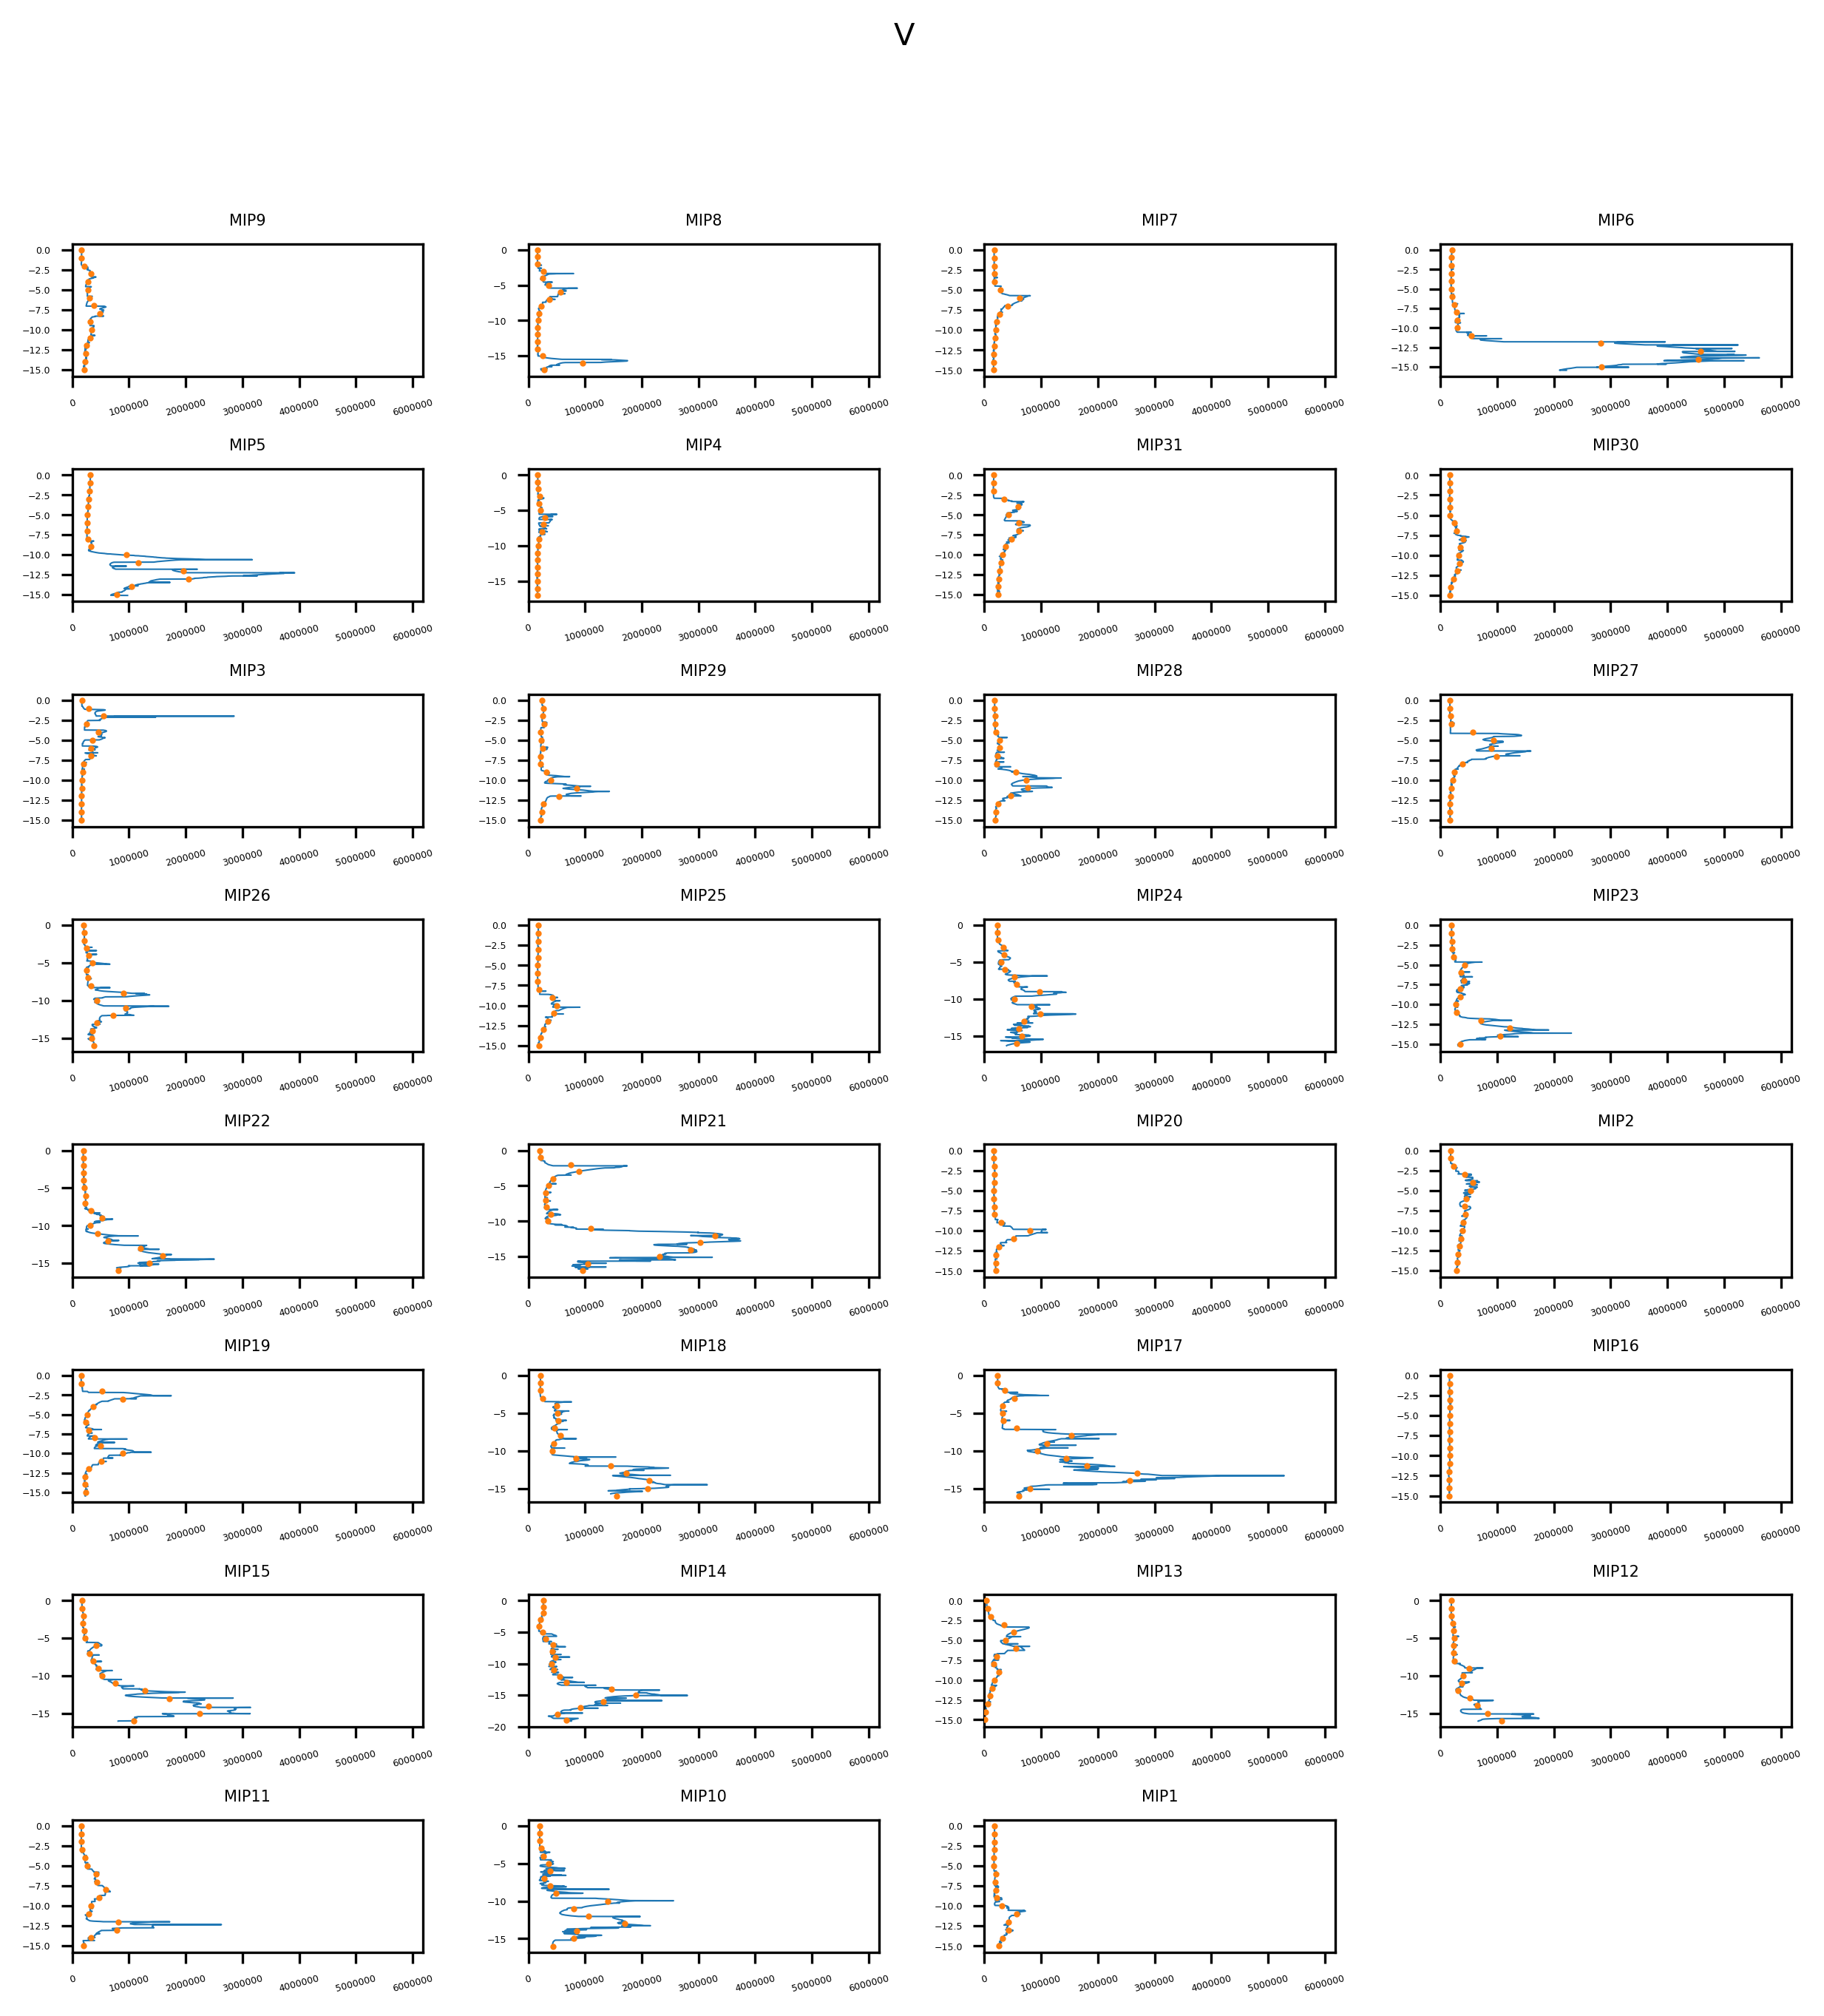

In [9]:
plot_downsampling(gd, preproc_gd)